In [2]:
# Pandas library is used for handling tabular data
import pandas as pd
# NumPy is used for handling numerical series operations (addition, multiplication, and ...)
import numpy as np
# Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing

# for visualizing the tree
import pydotplus
from IPython.display import Image

In [4]:
launch_data = pd.read_excel('Data/RocketLaunchDataCompleted.xlsx')
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN


In [5]:
launch_data.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

In [6]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

In [7]:
## To handle missing values, we will fill the missing values with appropriate values 
launch_data['Launched?'].fillna('N',inplace=True)
launch_data['Crewed or Uncrewed'].fillna('Uncrewed',inplace=True)
launch_data['Wind Direction'].fillna('unknown',inplace=True)
launch_data['Condition'].fillna('Fair',inplace=True)
launch_data.fillna(0,inplace=True)
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,Cloudy,0
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,Cloudy,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,Partly Cloudy,0
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,Partly Cloudy,0


In [17]:
## As part of the data cleaning process, we have to convert text data to numerical because computers understand only numbers
label_encoder = preprocessing.LabelEncoder()

# Three columns have categorical text info, and we convert them to numbers
launch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(launch_data['Crewed or Uncrewed'])
launch_data['Wind Direction'] = label_encoder.fit_transform(launch_data['Wind Direction'])
launch_data['Condition'] = label_encoder.fit_transform(launch_data['Condition'])

In [18]:
launch_data.head()

,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
0,1,75.0,68.0,71.00,0.0,75.0,55.0,65.0,0.0,0.08,0,16.0,15.0,0.0,0
1,1,78.0,70.0,73.39,0.0,75.0,55.0,65.0,0.0,0.09,0,14.0,10.0,0.0,0
2,1,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.0,0.09,2,15.0,10.0,11.0,0
3,1,76.0,57.0,66.04,0.0,75.0,55.0,65.0,0.0,0.08,1,10.0,10.0,0.0,6
4,1,79.0,60.0,70.52,0.0,75.0,55.0,65.0,0.0,0.09,0,12.0,10.0,0.0,6


In [9]:
# First, we save the output we are interested in. In this case, "launch" yes and no's go into the output variable.
y = launch_data['Launched?']

# Removing the columns we are not interested in
launch_data.drop(['Name','Date','Time (East Coast)','Location','Launched?','Hist Ave Sea Level Pressure','Sea Level Pressure','Day Length','Notes','Hist Ave Visibility', 'Hist Ave Max Wind Speed'],axis=1, inplace=True)

# Saving the rest of the data as input data
X = launch_data

In [20]:
# List of variables that our machine learning algorithm is going to look at:
X.columns

Index(['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
       'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
       'Hist Ave Temp', 'Percipitation at Launch Time',
       'Hist Ave Percipitation', 'Wind Direction', 'Max Wind Speed',
       'Visibility', 'Wind Speed at Launch Time', 'Condition'],
      dtype='object')

In [21]:
# Create decision tree classifier 
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [23]:
# Fitting the model to the training data
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [24]:
# Do prediction on test Data
y_pred = tree_model.predict(X_test)
print(y_pred)

['N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'Y']


In [29]:
# Calculate accuracy
tree_model.score(X_test,y_test)

0.9833333333333333

In [32]:
# Let's import a library for visualizing our decision tree.
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names,class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    return Image(graph.create_png())

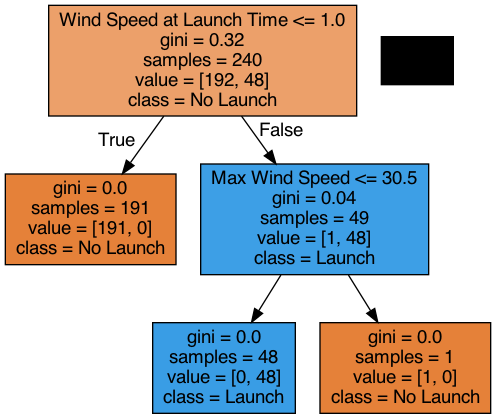

In [33]:
# This function takes a machine learning model and visualizes it.
tree_graph_to_png(tree=tree_model, feature_names=X.columns.values,class_names=['No Launch','Launch'], png_file_to_save='decision-tree.png')

In [34]:
launch_data[(launch_data['Wind Speed at Launch Time'] > 1) & (launch_data['Max Wind Speed'] > 30.5)]

,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
292,0,86.0,70.0,75.02,74.0,87.0,70.0,79.0,0.28,0.15,4,32.0,10.0,25.0,2


In [35]:
# ['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
#        'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
#        'Hist Ave Temp', 'Precipitation at Launch Time',
#        'Hist Ave Precipitation', 'Wind Direction', 'Max Wind Speed',
#        'Visibility', 'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
#        'Hist Ave Visibility', 'Condition']

data_input = [ 1.  , 75.  , 68.  , 71.  ,  0.  , 75.  , 55.  , 65.  ,  0.  , 0.08,  0.  , 16.  , 15.  ,  0.  ,  0. ]

tree_model.predict([data_input])


/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['N'], dtype=object)